In [ ]:
# https://www.sciencedirect.com/science/article/pii/S0006320717321547?via%3Dihub


In [7]:
%matplotlib inline

from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as mc
import spacepy.toolbox as tb
import spacepy.plot as spp
import tqdm
from scipy import stats
import seaborn as sns
sns.set()


%matplotlib inline

This unreleased version of SpacePy is not supported by the SpacePy team.


In [10]:
df = pd.read_excel('Bird_stats.xlsx', header=None, names=['name', 'sci', 'unthinned', 'thinned', 'AOS'])
df

,name,sci,unthinned,thinned,AOS
0,Woodhouse's Scrub-jay,Aphelocoma woodhouseii,32,18,WOSJ
1,Black-chinned hummingbird,Archilochus alexandri,2,1,BCHU
2,Juniper titmouse,Baeolophus ridgwayi,24,14,JUTI
3,Red-tailed hawk,Buteo jamaicensis,2,0,RTHA
4,Canyon wren,Catherpes mexicanus,3,0,CANW
5,Northern harrier,Circus hudsonius,1,0,NOHA
6,Northern flicker,Colaptes auratus,9,1,NOFL
7,Common nighthawk,Chordeiles minor,7,2,CONI
8,Western wood-pewee,Contopus sordidulus,40,15,WEWP
9,Common raven,Corvus corax,14,6,CORA


In [18]:
df.loc[df['unthinned'].nonzero()].count()

name         56
sci          56
unthinned    56
thinned      56
AOS          56
dtype: int64

In [19]:
df.loc[df['thinned'].nonzero()].count()

name         49
sci          49
unthinned    49
thinned      49
AOS          49
dtype: int64

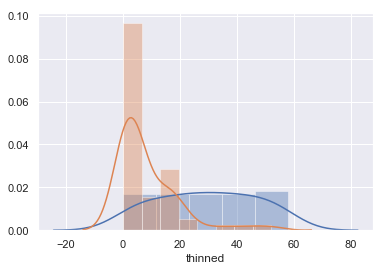

In [15]:
sns.distplot(df['unthinned'].nonzero(), )
sns.distplot(df['thinned'])